<a href="https://colab.research.google.com/github/mflas/Project4_GRP6_ML/blob/main/Project4_Working_2FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

#Import dependancies
import os
import pandas as pd
import tensorflow as tf
import numpy
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Data Extraction and Data Cleaning

In [5]:
#upload CSV and convert to Dataframe
#health_indicator = os.path.join("Resources", "diabetes_binary_health_indicators_BRFSS2015.csv")
#health_indicator_df = pd.read_csv(health_indicator)
#health_indicator_df.head()


url = 'https://raw.githubusercontent.com/mflas/Project4_GRP6_ML/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
health_indicator_df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
health_indicator_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [6]:
health_indicator_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [7]:
health_indicator_df = health_indicator_df.astype(int)

In [8]:
#check datatypes
health_indicator_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       70692 non-null  int64
 1   HighBP                70692 non-null  int64
 2   HighChol              70692 non-null  int64
 3   CholCheck             70692 non-null  int64
 4   BMI                   70692 non-null  int64
 5   Smoker                70692 non-null  int64
 6   Stroke                70692 non-null  int64
 7   HeartDiseaseorAttack  70692 non-null  int64
 8   PhysActivity          70692 non-null  int64
 9   Fruits                70692 non-null  int64
 10  Veggies               70692 non-null  int64
 11  HvyAlcoholConsump     70692 non-null  int64
 12  AnyHealthcare         70692 non-null  int64
 13  NoDocbcCost           70692 non-null  int64
 14  GenHlth               70692 non-null  int64
 15  MentHlth              70692 non-null  int64
 16  Phys

In [9]:
#drop na's
health_indicator_na = health_indicator_df.dropna(how = "any")
health_indicator_na.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


In [10]:

#check row for duplicate and then drop row
health_indicator_cleaned = health_indicator_na.drop_duplicates(subset = health_indicator_na.columns, keep = False)
health_indicator_cleaned.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
5,0,0,0,1,18,0,0,0,1,1,...,0,0,2,7,0,0,0,1,4,7


In [11]:
#info check types

health_indicator_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67889 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       67889 non-null  int64
 1   HighBP                67889 non-null  int64
 2   HighChol              67889 non-null  int64
 3   CholCheck             67889 non-null  int64
 4   BMI                   67889 non-null  int64
 5   Smoker                67889 non-null  int64
 6   Stroke                67889 non-null  int64
 7   HeartDiseaseorAttack  67889 non-null  int64
 8   PhysActivity          67889 non-null  int64
 9   Fruits                67889 non-null  int64
 10  Veggies               67889 non-null  int64
 11  HvyAlcoholConsump     67889 non-null  int64
 12  AnyHealthcare         67889 non-null  int64
 13  NoDocbcCost           67889 non-null  int64
 14  GenHlth               67889 non-null  int64
 15  MentHlth              67889 non-null  int64
 16  Phys

In [12]:
#reset index after drop
diabetes_health_indicator = health_indicator_cleaned.reset_index(drop = True)
diabetes_health_indicator.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,18,0,0,0,1,1,...,0,0,2,7,0,0,0,1,4,7


# Data Analysis

In [13]:
#apply check describe for standard analysis
diabetes_health_indicator.describe().applymap('{:,.2f}'.format)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,"67,889.00","67,889.00","67,889.00","67,889.00","67,889.00","67,889.00","67,889.00","67,889.00","67,889.00","67,889.00",...,"67,889.00","67,889.00","67,889.00","67,889.00","67,889.00","67,889.00","67,889.00","67,889.00","67,889.00","67,889.00"
mean,0.51,0.58,0.53,0.97,30.02,0.49,0.06,0.15,0.69,0.60,...,0.95,0.10,2.88,3.91,6.04,0.26,0.46,8.61,4.89,5.62
std,0.50,0.49,0.50,0.16,7.18,0.50,0.25,0.36,0.46,0.49,...,0.21,0.30,1.10,8.29,10.19,0.44,0.50,2.86,1.03,2.18
min,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,1.00,25.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,2.00,0.00,0.00,0.00,0.00,7.00,4.00,4.00
50%,1.00,1.00,1.00,1.00,29.00,0.00,0.00,0.00,1.00,1.00,...,1.00,0.00,3.00,0.00,0.00,0.00,0.00,9.00,5.00,6.00
75%,1.00,1.00,1.00,1.00,33.00,1.00,0.00,0.00,1.00,1.00,...,1.00,0.00,4.00,3.00,7.00,1.00,1.00,11.00,6.00,8.00
max,1.00,1.00,1.00,1.00,98.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,5.00,30.00,30.00,1.00,1.00,13.00,6.00,8.00


In [14]:

#print value counts with with out diabetes
print(diabetes_health_indicator['Diabetes_binary'].value_counts())

1    34867
0    33022
Name: Diabetes_binary, dtype: int64


In [15]:
#convert to % number of diabetes
print(diabetes_health_indicator['Diabetes_binary'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

1    51.36%
0    48.64%
Name: Diabetes_binary, dtype: object


In [16]:
#create dataframes for the 2 datasets
diabetes_df = diabetes_health_indicator[diabetes_health_indicator['Diabetes_binary'] == 1]
non_diabetes_df = diabetes_health_indicator[diabetes_health_indicator['Diabetes_binary'] == 0]

Begin Machine Learning


In [17]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dummies = pd.get_dummies(health_indicator_cleaned)
#application_dummies.head()
application_dummies.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [18]:
application_dummies.head(20)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
5,0,0,0,1,18,0,0,0,1,1,...,0,0,2,7,0,0,0,1,4,7
6,0,0,1,1,26,1,0,0,1,1,...,1,0,1,0,0,0,1,13,5,6
7,0,0,0,1,31,1,0,0,0,1,...,1,0,4,0,0,0,1,6,4,3
8,0,0,0,1,32,0,0,0,1,1,...,1,0,3,0,0,0,0,3,6,8
9,0,0,0,1,27,1,0,0,0,1,...,1,0,3,0,6,0,1,6,4,4
10,0,1,1,1,24,1,0,1,1,1,...,1,0,3,0,4,0,0,12,4,6


In [19]:
# Split our preprocessed data into our features and target arrays
X = application_dummies.drop('Diabetes_binary', axis=1).values
y = application_dummies['Diabetes_binary'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5)

Compile, Train and Evaluate the Model

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0, max_depth = 25)
model = dt.fit(X_train,y_train )

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Train the classifier on the training data
dt.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.653557224922669


Confusion Matrix:
[[4259 2296]
 [2408 4615]]


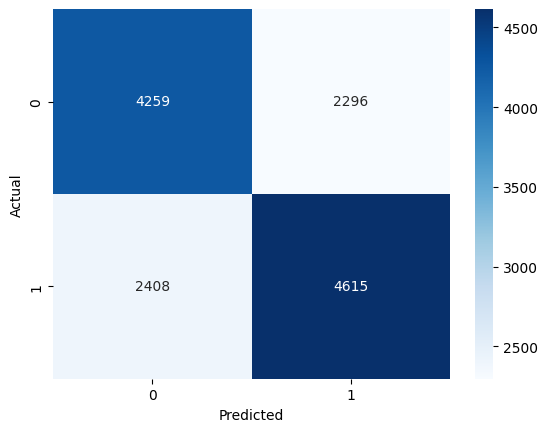

In [22]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
# Export our model to HDF5 file
nn_model_1.save('../h5_files/Group4_model_new.h5')

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# Export our model to HDF5 file
nn_model_1.save('/content/gdrive/My Drive/h5_files/Group4_model_new.h5')
#nn_model_1.save('/content/gdrive/My Drive/h5_files/Group4_model.joblib')

In [ ]:
#Check the location where the ckpt files were saved.
import os
print( os.getcwd() )
print( os.listdir('/content/gdrive/My Drive/h5_files') )

/content
['Group4_model_new.h5']


In [ ]:
# Export our model to HDF5 file
#Finally download the file
from google.colab import files
files.download( "/content/gdrive/My Drive/h5_files/Group4_model_new.h5" ) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from keras.models import load_model
model_path = "Group4_model_new.h5"
model = load_model(model_path)

In [ ]:
y_pred = model.predict(X_test_scaled)


531/531 [==============================] - 1s 1ms/step


In [ ]:
y = list(numpy.argmax(y_pred,axis=1))



In [ ]:
sum(y)

0

In [ ]:
sum(y_test)


8751

In [ ]:
len(y_test)


16973

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

dt = DecisionTreeClassifier(random_state = 0, max_depth = 25)
model = dt.fit(X_train,y_train )
X_test=[(1, 1, 1, 50, 1, 1, 1, 1, 1, 1, 1, 1, 1, 30, 30, 30, 1, 1, 30, 5, 100000)]


In [ ]:
y = dt.predict(X_test)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
sum(y)

1.0

In [ ]:
import pickle

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)


0.6456725387379957
